In [1]:
import requests
from pprint import pprint
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import datetime

%matplotlib notebook

#files to load
data_toload = "airline_data.csv"

#read csv files
data_path = os.path.join("../airline_data.csv")
flight_data = pd.read_csv(data_path)

flight_data.head()

,Unnamed: 0,Price,Airline,flyTo,cityTo,fare_family,fare_classes,cityFrom,local_departure,local_arrival,distance,bags_price,flight_no
0,0,54,['NK'],LGA,New York,NaN,U,Chicago,2019-02-01T05:51:00.000Z,2019-02-01T09:00:00.000Z,1178.35,37,224
1,1,54,['NK'],LGA,New York,NaN,U,Chicago,2019-02-01T17:43:00.000Z,2019-02-01T20:58:00.000Z,1178.35,37,630
2,2,56,['UA'],LGA,New York,NaN,N,Chicago,2019-02-01T07:30:00.000Z,2019-02-01T10:41:00.000Z,1178.35,22,427
3,3,56,['UA'],LGA,New York,NaN,N,Chicago,2019-02-01T21:05:00.000Z,2019-02-02T00:16:00.000Z,1178.35,22,2422
4,4,56,['UA'],LGA,New York,NaN,N,Chicago,2019-02-01T13:00:00.000Z,2019-02-01T16:11:00.000Z,1178.35,22,682


In [2]:
new = flight_data['local_departure'].str.split('T', n = 1, expand = True)

# making seperate first name column from new data frame
flight_data['Departure Date']= new[0]

# making seperate last name column from new data frame
flight_data['Departure Time']= new[1]

# Dropping old Name columns
flight_data.drop(columns =['local_departure'], inplace = True)

new = flight_data['local_arrival'].str.split('T', n = 1, expand = True)

# making seperate first name column from new data frame
flight_data['Arrival Date']= new[0]

# making seperate last name column from new data frame
flight_data['Arrival Time']= new[1]

flight_data.drop(columns =['local_arrival'], inplace = True)

In [3]:
#removing columns
del flight_data['fare_family']
del flight_data['fare_classes']
del flight_data['Unnamed: 0']

#removing characters
flight_data['Airline'] = flight_data['Airline'].str.strip('['']')
flight_data['Airline'] = flight_data['Airline'].str.replace("'","")

In [4]:
flight_data.head()

,Price,Airline,flyTo,cityTo,cityFrom,distance,bags_price,flight_no,Departure Date,Departure Time,Arrival Date,Arrival Time
0,54,NK,LGA,New York,Chicago,1178.35,37,224,2019-02-01,05:51:00.000Z,2019-02-01,09:00:00.000Z
1,54,NK,LGA,New York,Chicago,1178.35,37,630,2019-02-01,17:43:00.000Z,2019-02-01,20:58:00.000Z
2,56,UA,LGA,New York,Chicago,1178.35,22,427,2019-02-01,07:30:00.000Z,2019-02-01,10:41:00.000Z
3,56,UA,LGA,New York,Chicago,1178.35,22,2422,2019-02-01,21:05:00.000Z,2019-02-02,00:16:00.000Z
4,56,UA,LGA,New York,Chicago,1178.35,22,682,2019-02-01,13:00:00.000Z,2019-02-01,16:11:00.000Z


In [5]:
flight_data['Departure Date'] = pd.to_datetime(flight_data['Departure Date'])

flight_data['Departure Day'] = flight_data['Departure Date'].dt.day_name()

flight_data['Arrival Date'] = pd.to_datetime(flight_data['Arrival Date'])

flight_data['Arrival Day'] = flight_data['Arrival Date'].dt.day_name()

In [6]:
flight_data.head()

,Price,Airline,flyTo,cityTo,cityFrom,distance,bags_price,flight_no,Departure Date,Departure Time,Arrival Date,Arrival Time,Departure Day,Arrival Day
0,54,NK,LGA,New York,Chicago,1178.35,37,224,2019-02-01,05:51:00.000Z,2019-02-01,09:00:00.000Z,Friday,Friday
1,54,NK,LGA,New York,Chicago,1178.35,37,630,2019-02-01,17:43:00.000Z,2019-02-01,20:58:00.000Z,Friday,Friday
2,56,UA,LGA,New York,Chicago,1178.35,22,427,2019-02-01,07:30:00.000Z,2019-02-01,10:41:00.000Z,Friday,Friday
3,56,UA,LGA,New York,Chicago,1178.35,22,2422,2019-02-01,21:05:00.000Z,2019-02-02,00:16:00.000Z,Friday,Saturday
4,56,UA,LGA,New York,Chicago,1178.35,22,682,2019-02-01,13:00:00.000Z,2019-02-01,16:11:00.000Z,Friday,Friday


/Users/stevencantor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


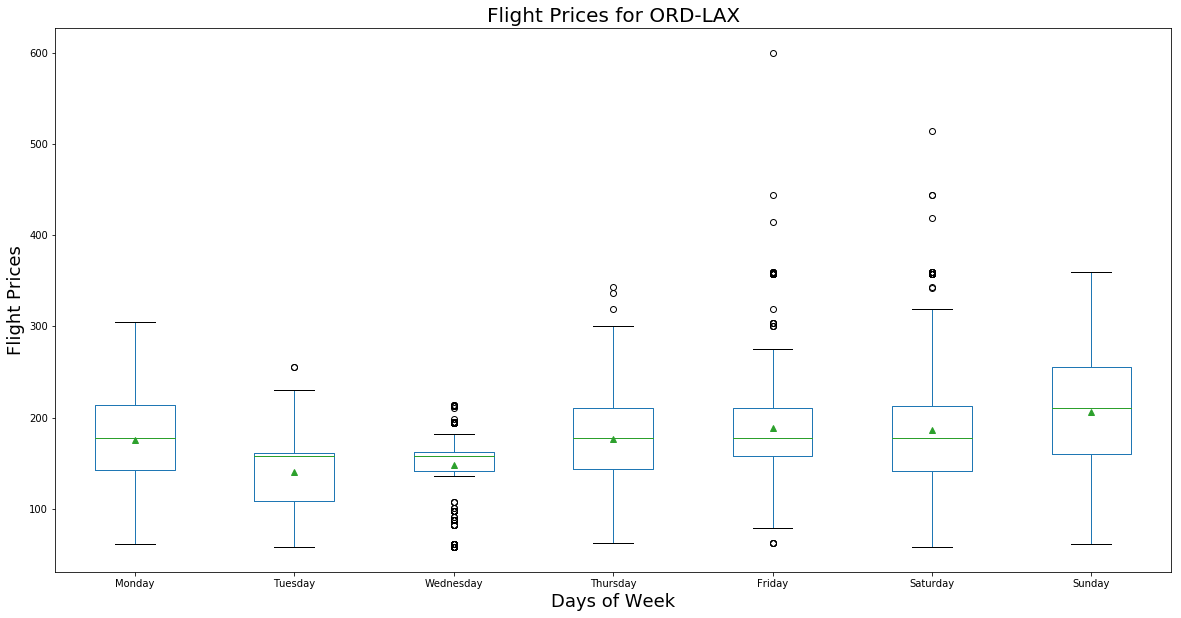

In [7]:
city_lax = flight_data.loc[flight_data["flyTo"] == "LAX",:]
city_lax['Departure Day'] = pd.Categorical(city_lax['Departure Day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
city_lax.pivot(columns='Departure Day', values='Price').plot(kind='box', showmeans=True, figsize=(20,10))
plt.title("Flight Prices for ORD-LAX", fontsize = 20)
plt.xlabel("Days of Week", fontsize=18)
plt.ylabel("Flight Prices", fontsize=18)
plt.savefig("Prices_ORD_LAX.png")

/Users/stevencantor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


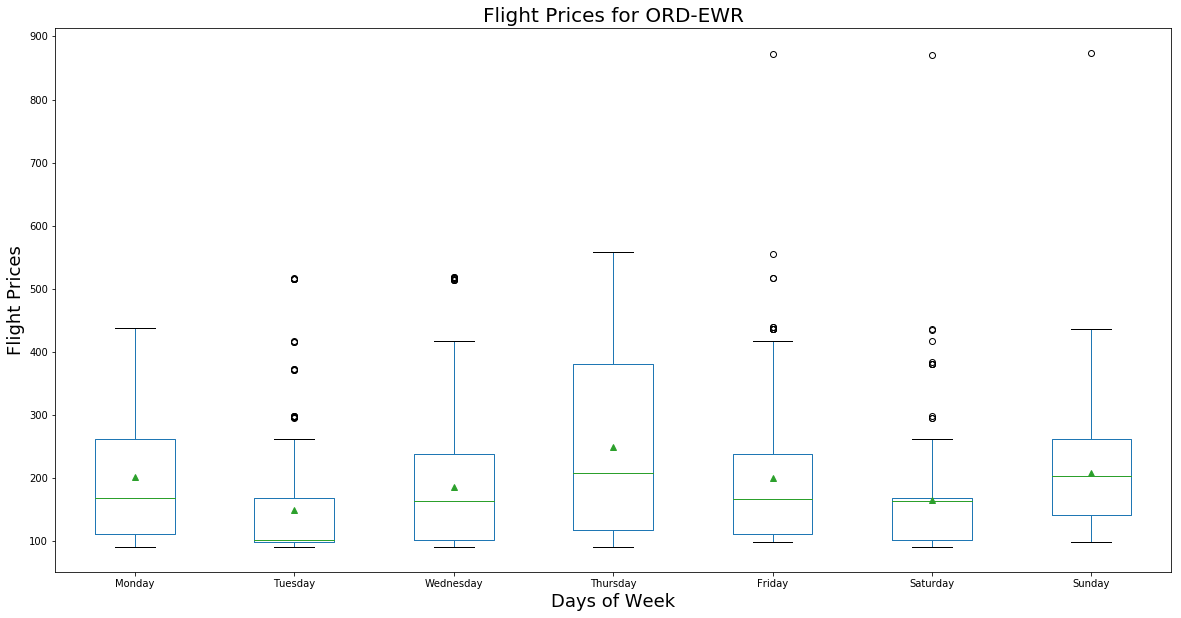

In [8]:
city_lax = flight_data.loc[flight_data["flyTo"] == "EWR",:]
city_lax['Departure Day'] = pd.Categorical(city_lax['Departure Day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
city_lax.pivot(columns='Departure Day', values='Price').plot(kind='box', showmeans=True, figsize=(20,10))
plt.title("Flight Prices for ORD-EWR", fontsize = 20)
plt.xlabel("Days of Week", fontsize=18)
plt.ylabel("Flight Prices", fontsize=18)

plt.savefig("Prices_ORD_EWR.png")

/Users/stevencantor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


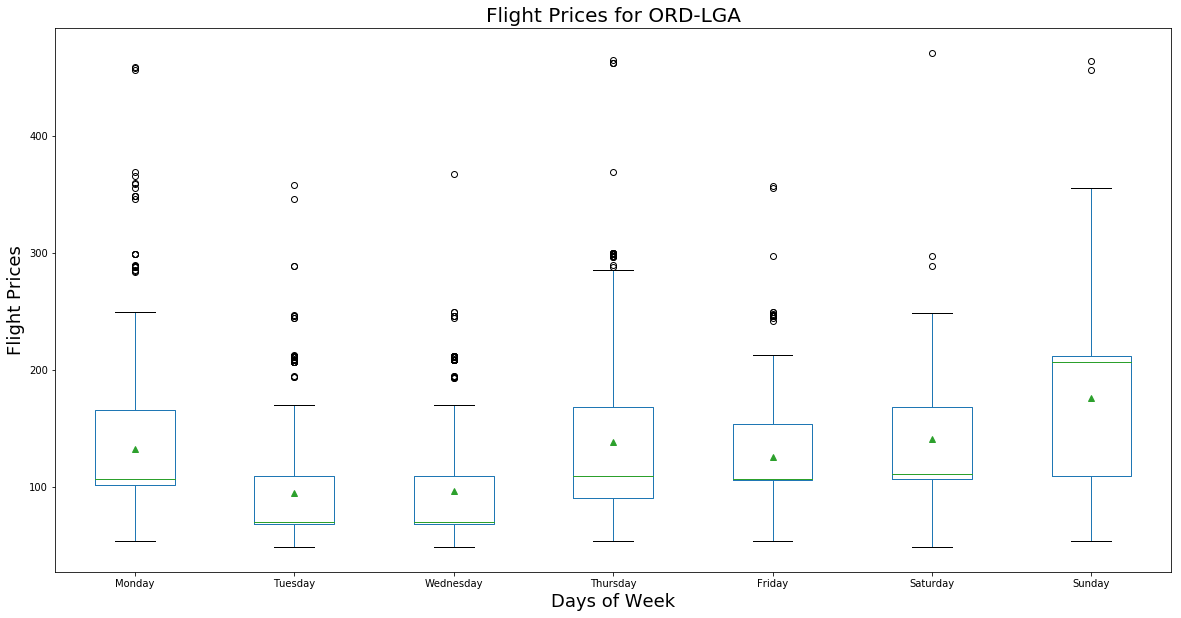

In [9]:
city_lax = flight_data.loc[flight_data["flyTo"] == "LGA",:]
city_lax['Departure Day'] = pd.Categorical(city_lax['Departure Day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
city_lax.pivot(columns='Departure Day', values='Price').plot(kind='box', showmeans=True, figsize=(20,10))
plt.title("Flight Prices for ORD-LGA", fontsize = 20)
plt.xlabel("Days of Week", fontsize=18)
plt.ylabel("Flight Prices", fontsize=18)
plt.savefig("Prices_ORD_LGA.png")

/Users/stevencantor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


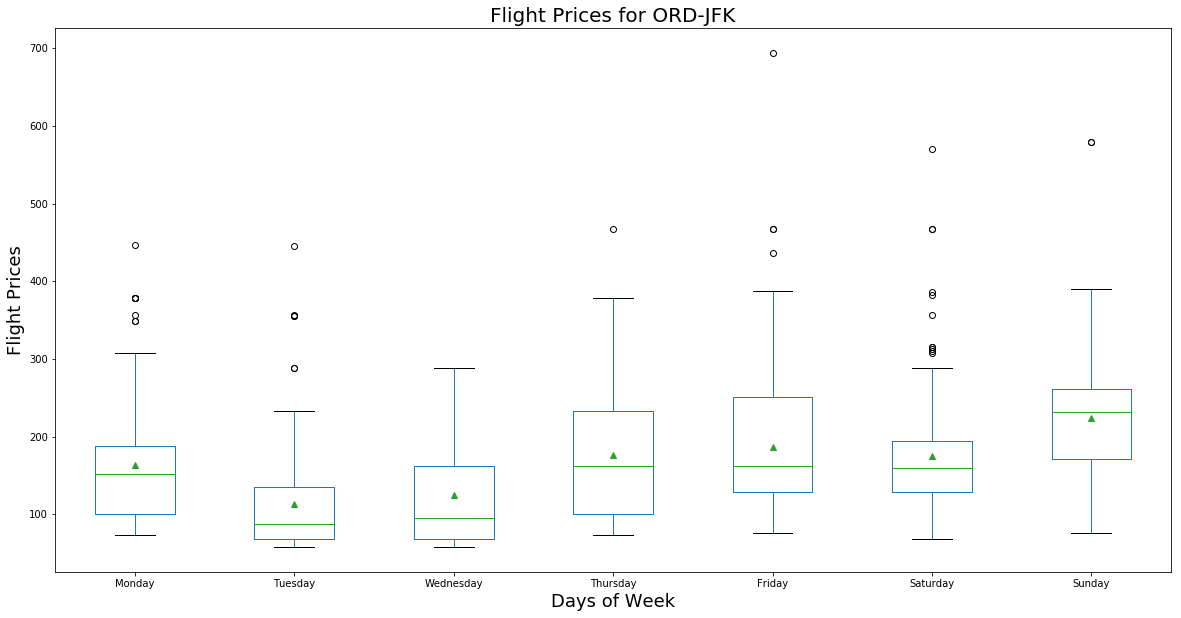

In [10]:
city_lax = flight_data.loc[flight_data["flyTo"] == "JFK",:]
city_lax['Departure Day'] = pd.Categorical(city_lax['Departure Day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
city_lax.pivot(columns='Departure Day', values='Price').plot(kind='box', showmeans=True, figsize=(20,10))
plt.title("Flight Prices for ORD-JFK", fontsize = 20)
plt.xlabel("Days of Week", fontsize=18)
plt.ylabel("Flight Prices", fontsize=18)
plt.savefig("Prices_ORD_JFK.png")

/Users/stevencantor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


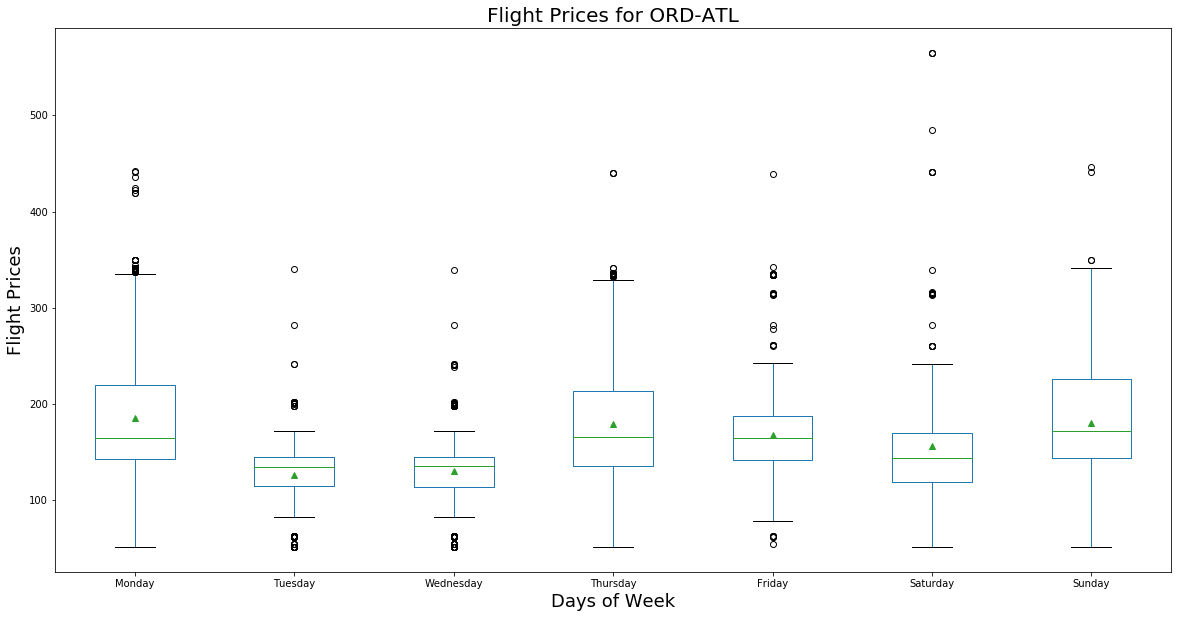

In [11]:
city_lax = flight_data.loc[flight_data["flyTo"] == "ATL",:]
city_lax['Departure Day'] = pd.Categorical(city_lax['Departure Day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
city_lax.pivot(columns='Departure Day', values='Price').plot(kind='box', showmeans=True, figsize=(20,10))
plt.title("Flight Prices for ORD-ATL", fontsize = 20)
plt.xlabel("Days of Week", fontsize=18)
plt.ylabel("Flight Prices", fontsize=18)

plt.savefig("Prices_ORD_ATL.png")

/Users/stevencantor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


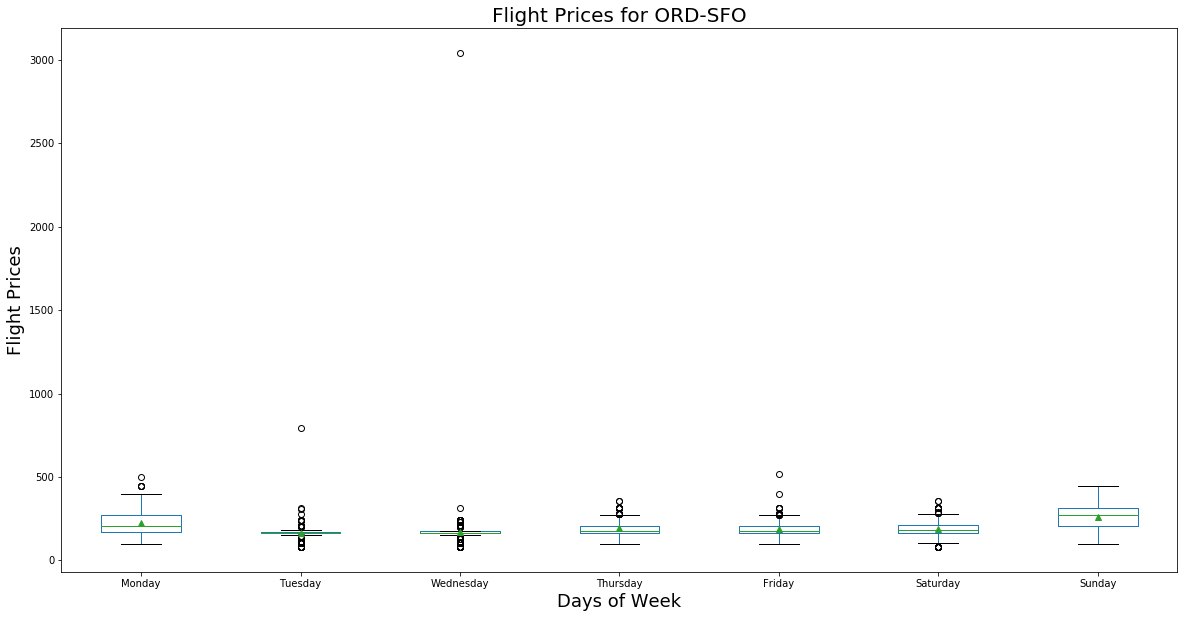

In [12]:
city_lax = flight_data.loc[flight_data["flyTo"] == "SFO",:]
city_lax['Departure Day'] = pd.Categorical(city_lax['Departure Day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
city_lax.pivot(columns='Departure Day', values='Price').plot(kind='box', showmeans=True, figsize=(20,10))
plt.title("Flight Prices for ORD-SFO", fontsize = 20)
plt.xlabel("Days of Week", fontsize=18)
plt.ylabel("Flight Prices", fontsize=18)

plt.savefig("Prices_ORD_SFO.png")

/Users/stevencantor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


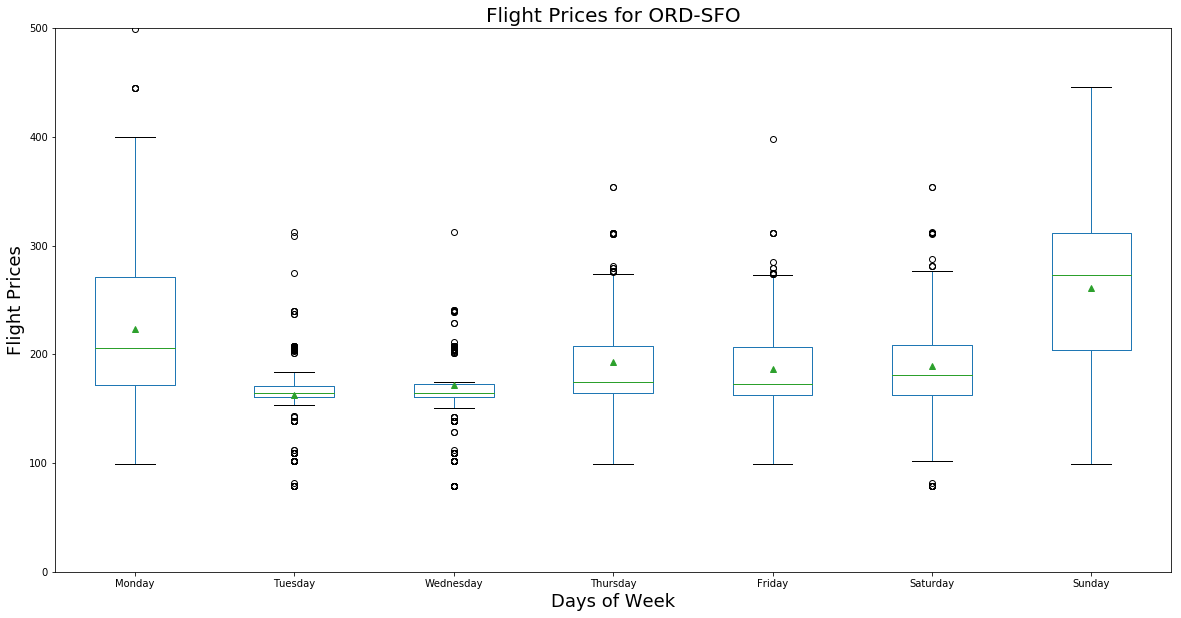

In [13]:
city_lax = flight_data.loc[flight_data["flyTo"] == "SFO",:]
city_lax['Departure Day'] = pd.Categorical(city_lax['Departure Day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
city_lax.pivot(columns='Departure Day', values='Price').plot(kind='box', showmeans=True, figsize=(20,10))
plt.ylim(0,500)
plt.title("Flight Prices for ORD-SFO", fontsize = 20)
plt.xlabel("Days of Week", fontsize=18)
plt.ylabel("Flight Prices", fontsize=18)

plt.savefig("Prices_ORD_SFO_nooutlier.png")

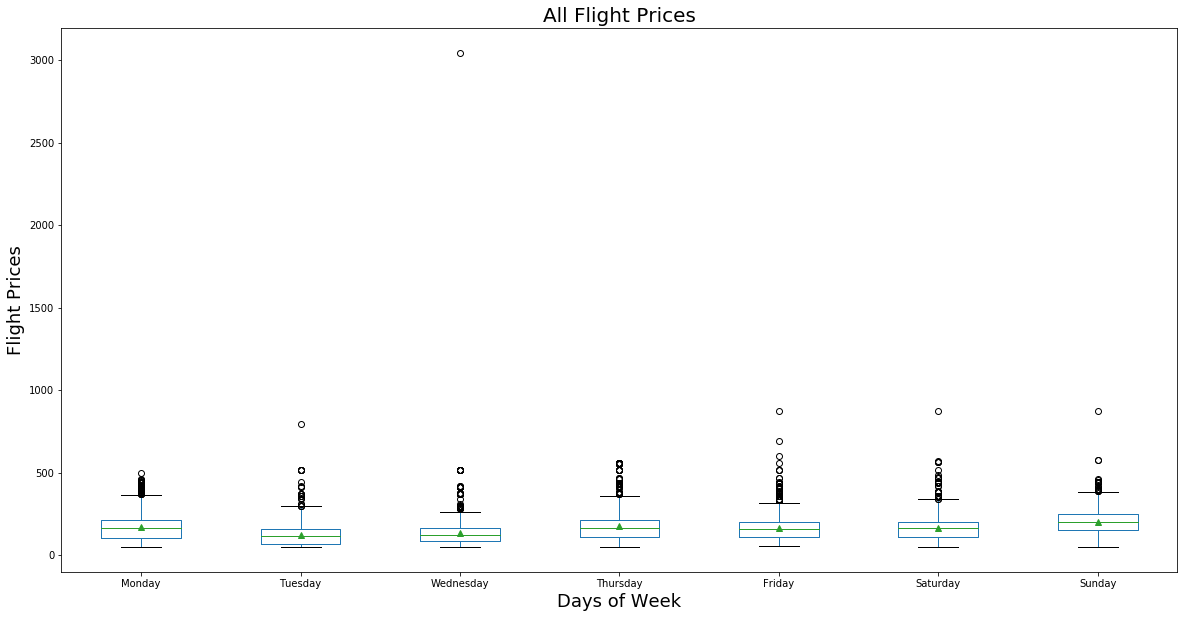

In [14]:
flight_data['Departure Day'] = pd.Categorical(flight_data['Departure Day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
flight_data.pivot(columns='Departure Day', values='Price').plot(kind='box', showmeans=True, figsize=(20,10))
plt.title("All Flight Prices", fontsize = 20)
plt.xlabel("Days of Week", fontsize=18)
plt.ylabel("Flight Prices", fontsize=18)

plt.savefig("Prices_All_Flights.png")

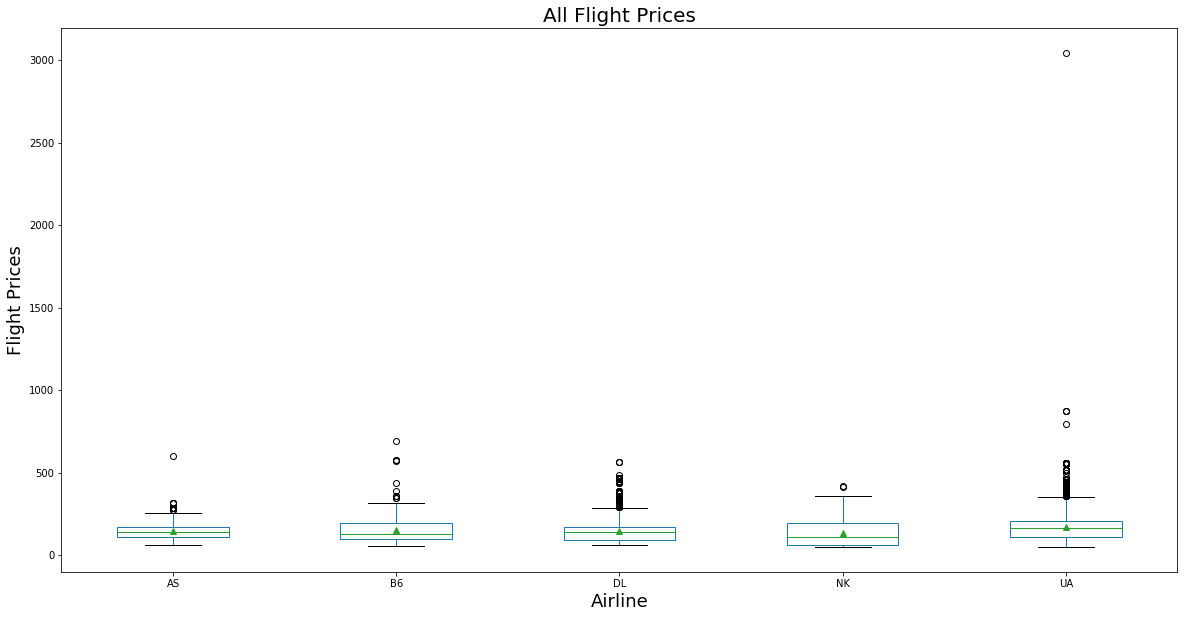

In [15]:
flight_data.pivot(columns='Airline', values='Price').plot(kind='box', showmeans=True, figsize=(20,10))
plt.title("All Flight Prices", fontsize = 20)
plt.xlabel("Airline", fontsize=18)
plt.ylabel("Flight Prices", fontsize=18)

plt.savefig("Prices_All_Flights.png")

,EWR,LGA,ATL,LAX,SFO,JFK
Departure Day,,,,,,
Monday,201.88,132.77,185.38,175.36,223.30,164.29
Tuesday,149.74,94.91,126.26,140.41,162.29,113.77
Wednesday,186.64,96.92,129.93,148.19,171.97,124.57
Thursday,249.49,138.88,179.26,176.77,193.43,176.91
Friday,200.16,125.83,167.41,188.09,186.22,186.51
Saturday,165.85,141.71,155.82,186.07,189.45,175.45
Sunday,207.85,175.98,180.58,206.17,260.58,224.31


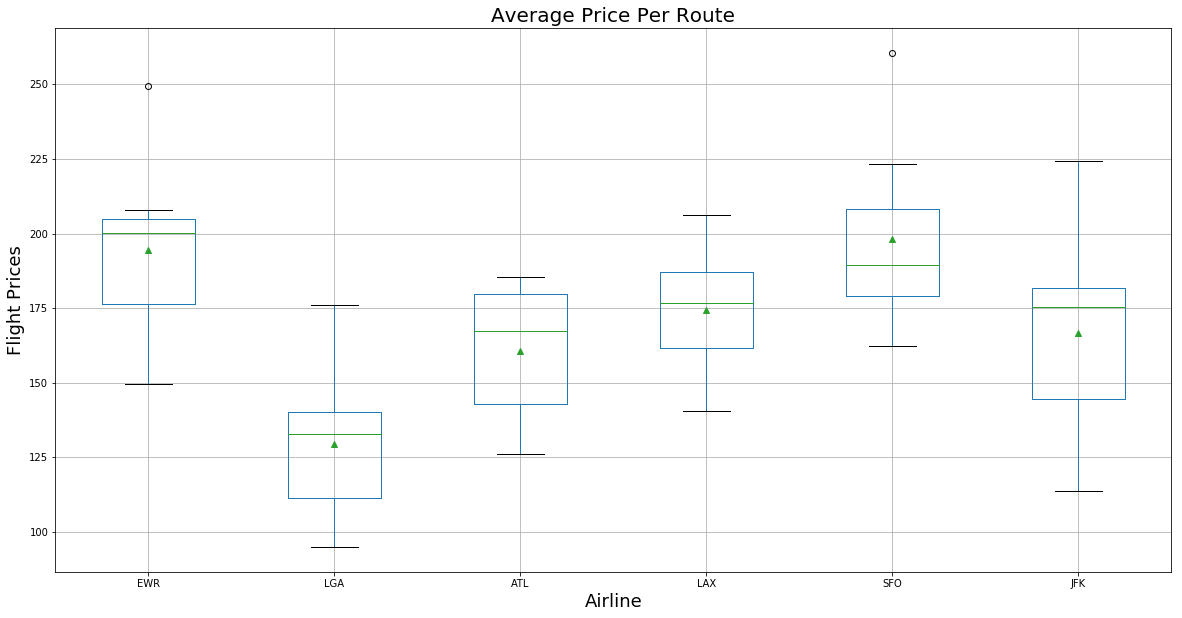

In [16]:
EWR_df = flight_data[flight_data['flyTo']=='EWR']
EWR_df_day = EWR_df.groupby('Departure Day')
EWR_day = round(EWR_df_day['Price'].mean(),2)

LGA_df = flight_data[flight_data['flyTo']=='LGA']
LGA_df_day = LGA_df.groupby('Departure Day')
LGA_day = round(LGA_df_day['Price'].mean(),2)

ATL_df = flight_data[flight_data['flyTo']=='ATL']
ATL_df_day = ATL_df.groupby('Departure Day')
ATL_day = round(ATL_df_day['Price'].mean(),2)

SFO_df = flight_data[flight_data['flyTo']=='SFO']
SFO_df_day = SFO_df.groupby('Departure Day')
SFO_day = round(SFO_df_day['Price'].mean(),2)

JFK_df = flight_data[flight_data['flyTo']=='JFK']
JFK_df_day = JFK_df.groupby('Departure Day')
JFK_day = round(JFK_df_day['Price'].mean(),2)

LAX_df = flight_data[flight_data['flyTo']=='LAX']
LAX_df_day = LAX_df.groupby('Departure Day')
LAX_day = round(LAX_df_day['Price'].mean(),2)

index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df = pd.DataFrame({'EWR': EWR_day, 'LGA': LGA_day, 'ATL': ATL_day, 'LAX': LAX_day, 'SFO': SFO_day, 'JFK': JFK_day})
ax = df.boxplot(rot=0,showmeans=True, figsize=(20,10))
plt.title("Average Price Per Route", fontsize = 20)
plt.xlabel("Airline", fontsize=18)
plt.ylabel("Flight Prices", fontsize=18)

plt.savefig("Avg_price_per_route.png")

df

In [17]:
number_flight_per_airline = flight_data.groupby(['Airline']).count()['flyTo']
number_flight_per_airline

Airline
AS     491
B6     360
DL    4776
NK     905
UA    9311
Name: flyTo, dtype: int64

In [18]:
number_flight_per_city = flight_data.groupby(['flyTo']).count()['Airline']
number_flight_per_city

flyTo
ATL    3199
EWR    1683
JFK    1167
LAX    2383
LGA    5186
SFO    2225
Name: Airline, dtype: int64

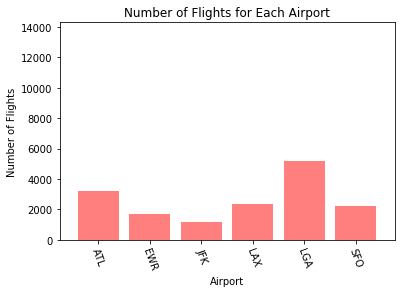

In [19]:
x_axis = np.arange(len(number_flight_per_city))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["ATL", "EWR", "JFK", "LAX", "LGA", "SFO"], rotation=290)
plt.bar(x_axis, number_flight_per_city, color='red', alpha=0.5, align="center")
plt.title("Number of Flights for Each Airport")
plt.xlabel("Airport")
plt.ylabel("Number of Flights")
plt.ylim(0, max(number_flight_per_airline)+5000)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.savefig("Number_of_flights_per_city.png")

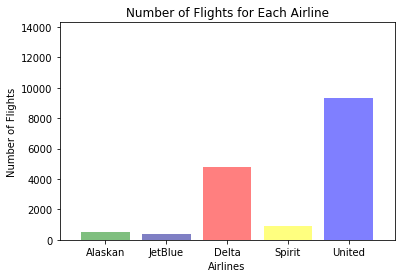

In [20]:
x_axis = np.arange(len(number_flight_per_airline))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Alaskan", "JetBlue", "Delta", "Spirit", "United"])
plt.bar(x_axis, number_flight_per_airline, color=['green', 'darkblue', 'red', 'yellow', 'blue'], alpha=0.5, align="center")
plt.title("Number of Flights for Each Airline")
plt.xlabel("Airlines")
plt.ylabel("Number of Flights")
plt.ylim(0, max(number_flight_per_airline)+5000)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.savefig("Number_of_flights_per_airline.png")

In [21]:
EWR = flight_data[flight_data['flyTo']=='EWR']
EWR_airline = EWR['Airline'].value_counts()

LGA = flight_data[flight_data['flyTo']=='LGA']
LGA_airline = LGA['Airline'].value_counts()

ATL = flight_data[flight_data['flyTo']=='ATL']
ATL_airline = ATL['Airline'].value_counts()

SFO = flight_data[flight_data['flyTo']=='SFO']
SFO_airline = SFO['Airline'].value_counts()

JFK = flight_data[flight_data['flyTo']=='JFK']
JFK_airline = JFK['Airline'].value_counts()

LAX = flight_data[flight_data['flyTo']=='LAX']
LAX_airline = LAX['Airline'].value_counts()

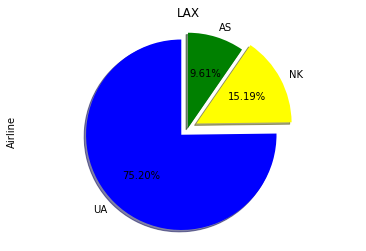

In [22]:
color=['blue', 'yellow', 'green']
explode = [0.1, 0.1, 0]
LAX_pie = LAX_airline.plot.pie(startangle = 90, explode=explode, shadow = True, autopct='%1.2f%%', colors = color)
plt.axis('equal')
plt.title('LAX')
plt.savefig('LAX_pie.png')

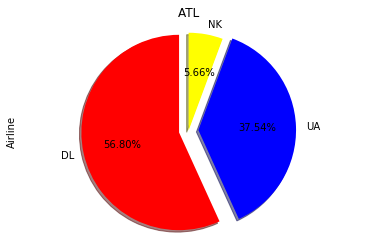

In [23]:
color=['red', 'blue', 'yellow']
explode = [0.1, 0.1, 0]
ATL_pie = ATL_airline.plot.pie(startangle = 90, explode=explode, shadow = True, autopct='%1.2f%%', colors = color)
plt.axis('equal')
plt.title('ATL')
plt.savefig('ATL_pie.png')

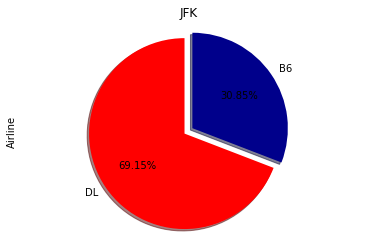

In [24]:
color=['red', 'darkblue']
explode = [0.1, 0]
JFK_pie = JFK_airline.plot.pie(startangle = 90, explode=explode, shadow = True, autopct='%1.2f%%', colors = color)
plt.axis('equal')
plt.title('JFK')
plt.savefig('JFK_pie.png')

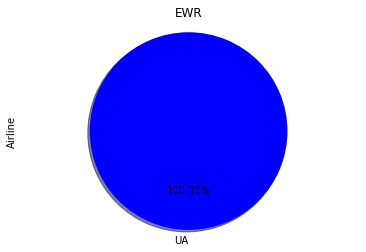

In [25]:
color=['blue']
EWR_pie = EWR_airline.plot.pie(startangle = 90, shadow = True, autopct='%1.2f%%', colors = color)
plt.axis('equal')
plt.title('EWR')
plt.savefig('EWR_pie.png')

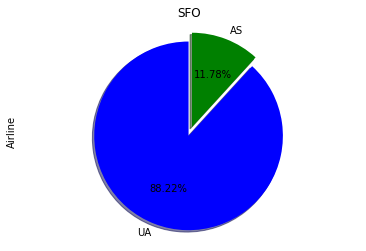

In [26]:
color=['blue','green']
explode = [0.1, 0]
SFO_pie = SFO_airline.plot.pie(startangle = 90, explode=explode, shadow = True, autopct='%1.2f%%', colors = color)
plt.axis('equal')
plt.title('SFO')
plt.savefig('SFO_pie.png')

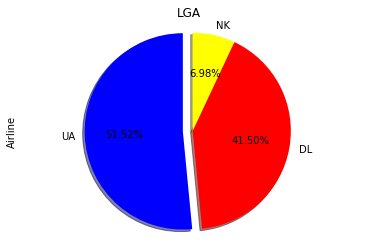

In [27]:
color=['blue','red','yellow']
explode = [0.1, 0, 0]
LGA_pie = LGA_airline.plot.pie(startangle = 90, explode=explode,shadow = True, autopct='%1.2f%%', colors = color)
plt.axis('equal')
plt.title('LGA')
plt.savefig('LGA_pie.png')

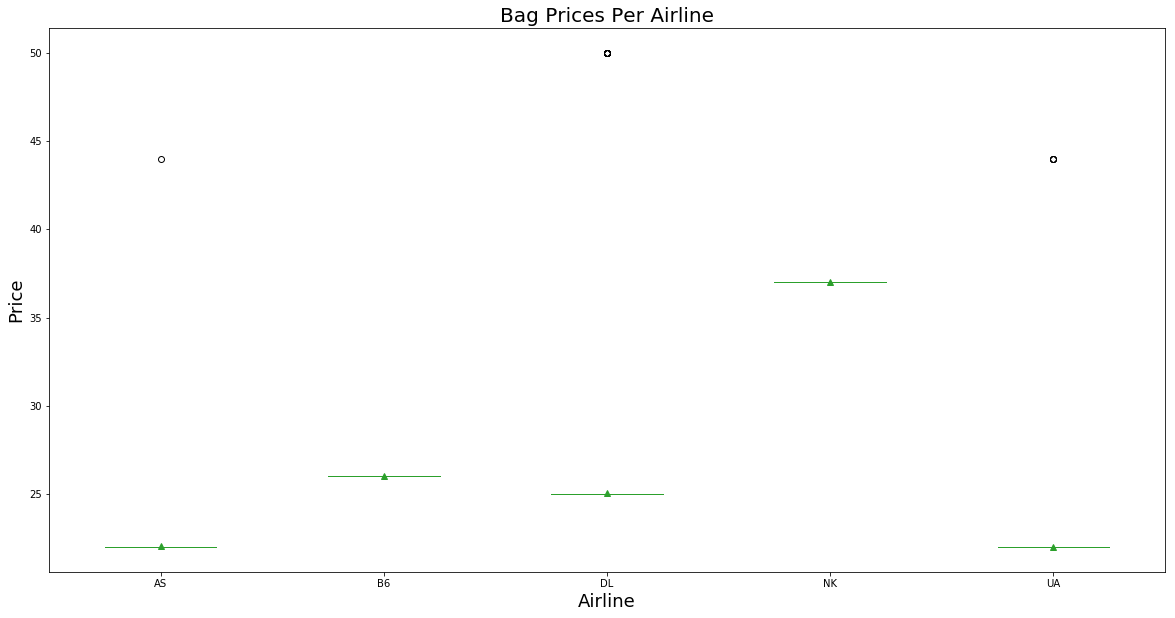

In [28]:
flight_data.pivot(columns='Airline', values='bags_price').plot(kind='box', showmeans=True, figsize =(20,10))
plt.title("Bag Prices Per Airline", fontsize = 20)
plt.xlabel("Airline", fontsize=18)
plt.ylabel("Price", fontsize=18)

plt.savefig('bag_prices_all_airlines.png')

In [29]:
min = flight_data.groupby(['flyTo', 'Airline']).min()['Price']
min
flight_data['Total']=flight_data['Price']+flight_data['bags_price']
min_with_bags = flight_data.groupby(['flyTo', 'Airline']).min()['Total']
min_with_bags

flyTo  Airline
ATL    DL          84
       NK          88
       UA          73
EWR    UA         113
JFK    B6          84
       DL          92
LAX    AS          83
       NK          95
       UA          83
LGA    DL          91
       NK          86
       UA          78
SFO    AS         101
       UA         101
Name: Total, dtype: int64

In [30]:
min_day = flight_data.groupby(['flyTo', 'Airline', 'Departure Day']).min()['Price']
min_day
min_with_bags_and_day = flight_data.groupby(['flyTo', 'Airline', 'Departure Day']).min()['Total']
min_with_bags_and_day
min_just_day = flight_data.groupby(['flyTo', 'Departure Day']).min()['Price']
min_just_day
min_with_bags_and_just_day = flight_data.groupby(['flyTo', 'Departure Day']).min()['Total']
min_with_bags_and_just_day

flyTo  Departure Day
ATL    Monday            73
       Tuesday           73
       Wednesday         73
       Thursday          73
       Friday            86
       Saturday          73
       Sunday            73
EWR    Monday           113
       Tuesday          113
       Wednesday        113
       Thursday         113
       Friday           121
       Saturday         113
       Sunday           121
JFK    Monday            99
       Tuesday           84
       Wednesday         84
       Thursday          99
       Friday           101
       Saturday          94
       Sunday           101
LAX    Monday            83
       Tuesday           83
       Wednesday         83
       Thursday         100
       Friday           100
       Saturday          83
       Sunday            83
LGA    Monday            78
       Tuesday           78
       Wednesday         78
       Thursday          78
       Friday            78
       Saturday          78
       Sunday            78

In [31]:
mean = flight_data.groupby(['flyTo', 'Airline']).mean()['Price']
mean
flight_data['Total']=flight_data['Price']+flight_data['bags_price']
mean_with_bags = round(flight_data.groupby(['flyTo', 'Airline']).mean()['Total'],2)
mean_with_bags

flyTo  Airline
ATL    DL         185.08
       NK         171.86
       UA         187.35
EWR    UA         217.92
JFK    B6         180.25
       DL         196.68
LAX    AS         161.16
       NK         200.03
       UA         202.36
LGA    DL         147.43
       NK         148.41
       UA         154.61
SFO    AS         175.99
       UA         225.70
Name: Total, dtype: float64

In [32]:
mean_day = flight_data.groupby(['flyTo', 'Airline', 'Departure Day']).mean()['Price']
mean_day
mean_with_bags_and_day = flight_data.groupby(['flyTo', 'Airline', 'Departure Day']).mean()['Total']
mean_with_bags_and_day
mean_just_day = flight_data.groupby(['flyTo', 'Departure Day']).mean()['Price']
mean_just_day
mean_with_bags_and_just_day = round(flight_data.groupby(['flyTo', 'Departure Day']).mean()['Total'],2)
mean_with_bags_and_just_day

flyTo  Departure Day
ATL    Monday           209.98
       Tuesday          150.79
       Wednesday        154.45
       Thursday         203.80
       Friday           191.93
       Saturday         180.39
       Sunday           205.17
EWR    Monday           223.88
       Tuesday          171.74
       Wednesday        208.64
       Thursday         271.49
       Friday           222.25
       Saturday         187.85
       Sunday           229.85
JFK    Monday           189.59
       Tuesday          139.08
       Wednesday        149.87
       Thursday         202.21
       Friday           211.95
       Saturday         200.95
       Sunday           249.62
LAX    Monday           199.55
       Tuesday          164.61
       Wednesday        172.38
       Thursday         200.95
       Friday           212.27
       Saturday         210.85
       Sunday           230.52
LGA    Monday           157.02
       Tuesday          119.26
       Wednesday        121.37
       Thursday   

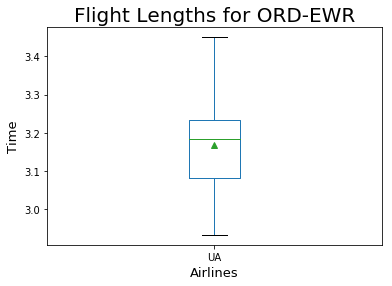

In [33]:
arr_time = flight_data["Arrival Time"].str.split(".", n = 1, expand = True) 

# making seperate first name column from new data frame 
flight_data["Time"]= arr_time[0] 
  
    
# making seperate last name column from new data frame 

flight_data.drop(columns =["Arrival Time"], inplace = True)

dep_time = flight_data["Departure Time"].str.split(".", n = 1, expand = True) 
flight_data["dTime"]= dep_time[0] 
  
# making seperate last name column from new data frame 

flight_data.drop(columns =["Departure Time"], inplace = True)

flight_data["dTime2"]= pd.to_datetime(flight_data["Departure Date"].astype(str) + "T" + flight_data["dTime"])
    
flight_data["Time2"]= pd.to_datetime(flight_data["Arrival Date"].astype(str) + "T" + flight_data["Time"])    

flight_data["Length"] = flight_data['Time2'] - (flight_data["dTime2"])

EWR_length = flight_data[flight_data['flyTo']=="EWR"]
JFK_length = flight_data[flight_data['flyTo']=="JFK"]
SFO_length = flight_data[flight_data['flyTo']=="SFO"]
LGA_length = flight_data[flight_data['flyTo']=="LGA"]
LAX_length = flight_data[flight_data['flyTo']=="LAX"]
ATL_length = flight_data[flight_data['flyTo']=="ATL"]

flight_data["Length_hour"]=flight_data["Length"]/pd.Timedelta(hours=1)

EWR_length = flight_data[flight_data['flyTo']=="EWR"]
JFK_length = flight_data[flight_data['flyTo']=="JFK"]
SFO_length = flight_data[flight_data['flyTo']=="SFO"]
LGA_length = flight_data[flight_data['flyTo']=="LGA"]
LAX_length = flight_data[flight_data['flyTo']=="LAX"]
ATL_length = flight_data[flight_data['flyTo']=="ATL"]

EWR_length.pivot(columns='Airline', values='Length_hour').plot(kind='box', showmeans=True)
plt.title("Flight Lengths for ORD-EWR", fontsize = 20)
plt.ylabel("Time", fontsize=13)
plt.xlabel("Airlines", fontsize=13)
plt.savefig('EWR_flight_length.png')

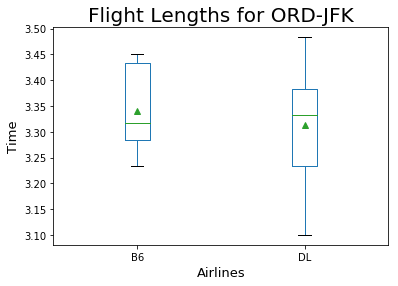

In [34]:
JFK_length.pivot(columns='Airline', values='Length_hour').plot(kind='box', showmeans=True)
plt.title("Flight Lengths for ORD-JFK", fontsize = 20)
plt.ylabel("Time", fontsize=13)
plt.xlabel("Airlines", fontsize=13)
plt.savefig('JFK_flight_length.png')

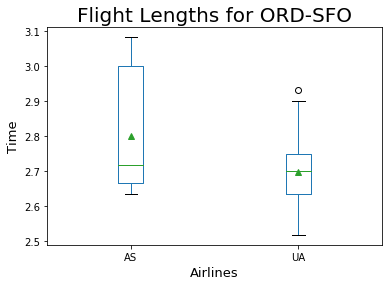

In [35]:
SFO_length.pivot(columns='Airline', values='Length_hour').plot(kind='box', showmeans=True)
plt.title("Flight Lengths for ORD-SFO", fontsize = 20)
plt.ylabel("Time", fontsize=13)
plt.xlabel("Airlines", fontsize=13)
plt.savefig('SFO_flight_length.png')

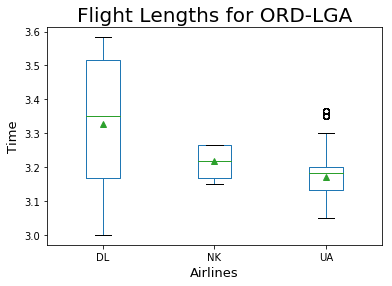

In [36]:
LGA_length.pivot(columns='Airline', values='Length_hour').plot(kind='box', showmeans=True)
plt.title("Flight Lengths for ORD-LGA", fontsize = 20)
plt.ylabel("Time", fontsize=13)
plt.xlabel("Airlines", fontsize=13)
plt.savefig('LGA_flight_length.png')

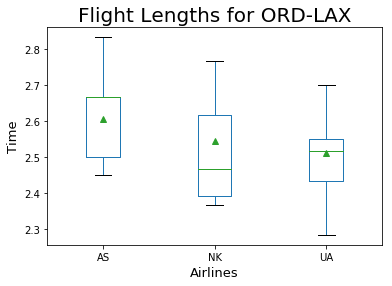

In [37]:
LAX_length.pivot(columns='Airline', values='Length_hour').plot(kind='box', showmeans=True)
plt.title("Flight Lengths for ORD-LAX", fontsize = 20)
plt.ylabel("Time", fontsize=13)
plt.xlabel("Airlines", fontsize=13)
plt.savefig('LAX_flight_length.png')

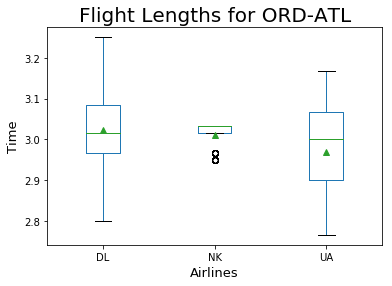

In [38]:
ATL_length.pivot(columns='Airline', values='Length_hour').plot(kind='box', showmeans=True)
plt.title("Flight Lengths for ORD-ATL", fontsize = 20)
plt.ylabel("Time", fontsize=13)
plt.xlabel("Airlines", fontsize=13)
plt.savefig('ATL_flight_length.png')

In [39]:
min_airline_bag = flight_data.groupby('Airline').min()['Total']
min_airline_ticket = flight_data.groupby('Airline').min()['Price']
avg_airline_bag = round(flight_data.groupby('Airline').mean()['Total'],2)
avg_airline_ticket = round(flight_data.groupby('Airline').mean()['Price'],2)
index = ['Alaskan AIrlines', 'Jet Blue', 'Delta Airlines', 'Spirit Airlines', 'United Airlines']
responses_dict = {'Lowest Price with Bags': min_airline_bag,'Lowest Price w/o Bags': min_airline_ticket, 'Average Price with Bags': avg_airline_bag, 'Average Price w/o Bags': avg_airline_ticket}
airline_comparison_df = pd.DataFrame(responses_dict)
airline_comparison_df.to_csv('Comparison.csv')
airline_comparison_df


,Lowest Price with Bags,Lowest Price w/o Bags,Average Price with Bags,Average Price w/o Bags
Airline,,,,
AS,83,61,169.07,147.03
B6,84,58,180.25,154.25
DL,84,59,170.08,145.02
NK,86,49,173.75,136.75
UA,73,51,194.45,172.44


In [40]:
min_day_bag = flight_data.groupby('Departure Day').min()['Total']
min_day_ticket = flight_data.groupby('Departure Day').min()['Price']
avg_day_bag = round(flight_data.groupby('Departure Day').mean()['Total'],2)
avg_day_ticket = round(flight_data.groupby('Departure Day').mean()['Price'],2)
index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
responses_dict = {'Lowest Price with Bags': min_day_bag,'Lowest Price w/o Bags': min_day_ticket, 'Average Price with Bags': avg_day_bag, 'Average Price w/o Bags': avg_day_ticket}
airline_comparison_day_df = pd.DataFrame(responses_dict)
airline_comparison_day_df

,Lowest Price with Bags,Lowest Price w/o Bags,Average Price with Bags,Average Price w/o Bags
Departure Day,,,,
Monday,73,51,195.14,171.31
Tuesday,73,49,147.95,124.09
Wednesday,73,49,156.54,132.65
Thursday,73,51,198.17,174.33
Friday,78,54,187.30,163.45
Saturday,73,49,190.54,166.45
Sunday,73,51,224.73,200.90
